# EDA on general features & after tokenization

## Import data & modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

## Light general exploration

In [4]:
print(df.columns)

Index(['url', 'story_id', 'soup', 'title', 'author', 'contest_num',
       'won_contest', 'num_likes', 'num_comments', 'story_html',
       'date_published', 'num_sent', 'story_sent', 'sent_lengths',
       'sent_avg_length', 'sent_words', 'story_word_toks', 'words',
       'punctuation', 'num_words', 'unique_words', 'num_unique_words',
       'unique_words_percent', 'age', 'num_cats', 'cat_Creative',
       'cat_Bedtime', 'cat_Latinx', 'cat_Black', 'cat_Funny', 'cat_Suspense',
       'cat_Desi', 'cat_Crime', 'cat_Sad', 'cat_Speculative',
       'cat_Inspirational', 'cat_Thriller', 'cat_Indigenous', 'cat_Color',
       'cat_Age', 'cat_Romance', 'cat_Fantasy', 'cat_Adventure', 'cat_East',
       'cat_Christian', 'cat_American', 'cat_Nonfiction', 'cat_Contemporary',
       'cat_Coming', 'cat_Western', 'cat_Adult', 'cat_Christmas', 'cat_High',
       'cat_Horror', 'cat_Mystery', 'cat_African', 'cat_Gay', 'cat_Young',
       'cat_Friendship', 'cat_Asian', 'cat_Teens', 'cat_Lesbian',
      

In [5]:
print('Dataset dimensions:', df.shape)
print('Does the dataset contain NA?', df.isna().any().any())
print('Data types in dataset:')
print(df.dtypes.value_counts())

Dataset dimensions: (18248, 74)
Does the dataset contain NA? True
Data types in dataset:
int64      56
object     16
float64     2
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   18248 non-null  object 
 1   story_id              18248 non-null  object 
 2   soup                  18248 non-null  object 
 3   title                 18248 non-null  object 
 4   author                18246 non-null  object 
 5   contest_num           18248 non-null  object 
 6   won_contest           236 non-null    object 
 7   num_likes             18248 non-null  int64  
 8   num_comments          18248 non-null  int64  
 9   story_html            18248 non-null  object 
 10  date_published        18248 non-null  object 
 11  num_sent              18248 non-null  int64  
 12  story_sent            18248 non-null  object 
 13  sent_lengths          18248 non-null  object 
 14  sent_avg_length       18248 non-null  float64
 15  sent_words         

In [19]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'sent_avg_length', 'num_words', 'num_unique_words', 
             'unique_words_percent', 'age', 'num_cats']

In [21]:
df[numerical].describe()

,num_likes,num_comments,num_sent,sent_avg_length,num_words,num_unique_words,unique_words_percent,age,num_cats
count,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000
mean,14.138700,4.295758,120.055677,19.276800,1772.405031,653.573707,0.381445,502.618972,2.950460
std,18.742977,17.676338,54.727511,20.451749,663.541656,195.346379,0.053579,160.524603,1.175209
min,0.000000,0.000000,1.000000,4.197222,410.000000,187.000000,0.143804,124.000000,1.000000
25%,7.000000,0.000000,80.000000,14.826714,1191.000000,494.000000,0.343524,430.000000,2.000000
50%,10.000000,1.000000,108.000000,17.500000,1568.000000,607.000000,0.381038,518.000000,3.000000
75%,14.000000,3.000000,151.000000,20.910654,2265.000000,793.000000,0.417994,621.000000,3.000000
max,503.000000,629.000000,414.000000,1459.000000,4620.000000,1508.000000,0.638215,1154.000000,8.000000


In [23]:
with pd.option_context('display.max_rows', 1, 'display.max_columns', None): 
    display(df.sample(1))

,url,story_id,soup,title,author,contest_num,won_contest,num_likes,num_comments,story_html,date_published,num_sent,story_sent,sent_lengths,sent_avg_length,sent_words,story_word_toks,words,punctuation,num_words,unique_words,num_unique_words,unique_words_percent,age,num_cats,cat_Creative,cat_Bedtime,cat_Latinx,cat_Black,cat_Funny,cat_Suspense,cat_Desi,cat_Crime,cat_Sad,cat_Speculative,cat_Inspirational,cat_Thriller,cat_Indigenous,cat_Color,cat_Age,cat_Romance,cat_Fantasy,cat_Adventure,cat_East,cat_Christian,cat_American,cat_Nonfiction,cat_Contemporary,cat_Coming,cat_Western,cat_Adult,cat_Christmas,cat_High,cat_Horror,cat_Mystery,cat_African,cat_Gay,cat_Young,cat_Friendship,cat_Asian,cat_Teens,cat_Lesbian,cat_Holiday,cat_Fiction,cat_Drama,cat_School,cat_Science,cat_Happy,cat_Transgender,cat_Urban,cat_Kids,cat_Middle,cat_Historical,cat_People
16736,https://blog.reedsy.com/short-story/qb9v3s/,qb9v3s,<!DOCTYPE html>\n\n<html>\n<head>\n<meta chars...,The Meaning is in the Flowers,Lyn Vj Bennett Wilson,"['Contest', '#86']",NaN,9,0,"<article class=""font-alt submission-content sp...",2021-03-27 01:02:00,227,['\nLast week felt like it lasted an entire mo...,[10 15 26 15 11 19 13 16 21 7 10 8 11 19 7 ...,15.885463,"[list(['Last', 'week', 'felt', 'like', 'it', '...","['Last', 'week', 'felt', 'like', 'it', 'lasted...",['Last' 'week' 'felt' ... 'read' 'For' 'now'],"['.' '.' ',' ',' ',' '.' '“' '”' '.' '.' ',' '...",3036,"{'present', 'occurred', 'bouquets', 'get', 'so...",977,0.321805,557,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Distributions

Distribution of numerical features:

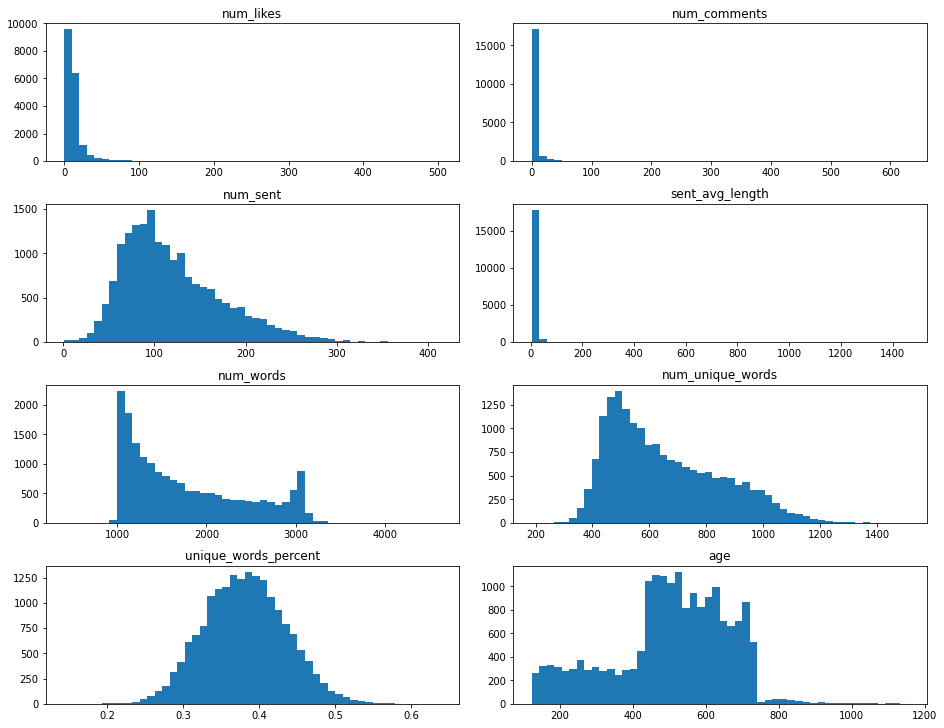

In [24]:
my_j = int(len(numerical)/2)
f,ax=plt.subplots(my_j,2, figsize=(13,10), constrained_layout = True)
feat_iter=iter(numerical)
for i in range(my_j):
    for j in range(2):
      try:
        x = next(feat_iter)
        ax[i,j].hist(df[x], bins=50)
        ax[i,j].set_title(x)
      except StopIteration:
          pass

Distribution of target

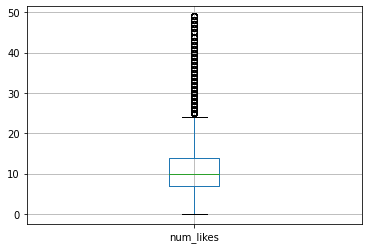

In [25]:
threshold = 50
df[df.num_likes<threshold].boxplot(column='num_likes')

Distribution of categorical features:

In [35]:
categories = [col for col in df if col.startswith('cat')]
categories.remove('cat_Fiction')
# for cat in categories:
#   df.boxplot(column='num_likes', by=cat, vert=False)
#   plt.title(f'num_likes distribution per {cat}')
#   plt.suptitle('')
#   plt.show()

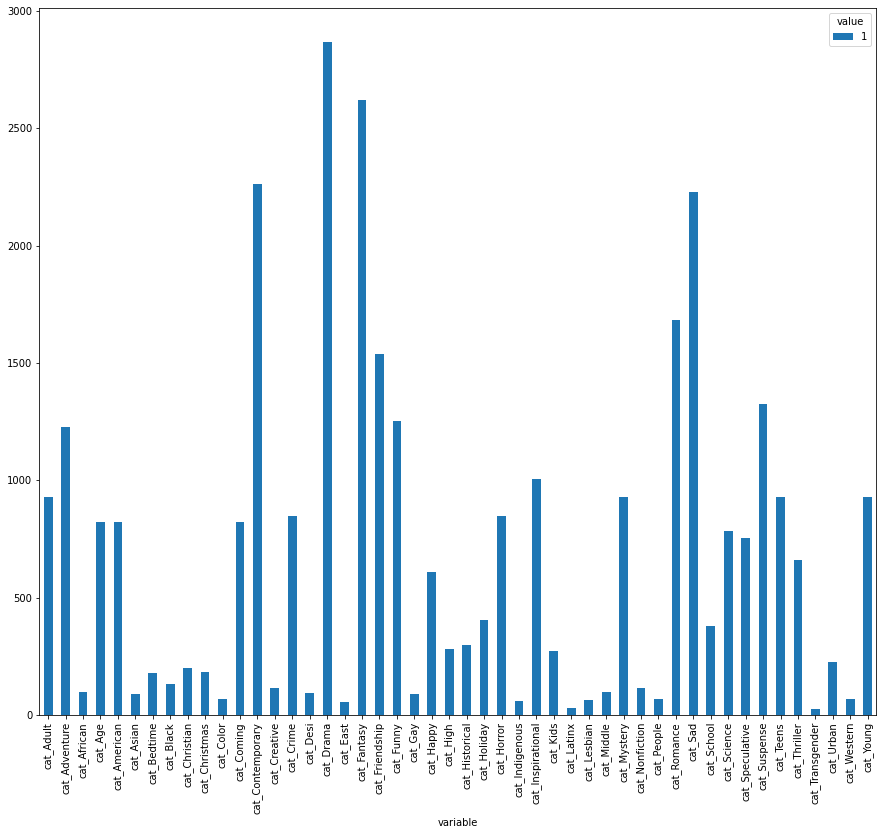

In [16]:
dfm = df[categories].melt()
dfm = dfm[dfm.value==1]
plot_df = (
    pd.crosstab(dfm['variable'], dfm['value'])
)
plot_df.plot.bar(figsize=(15,13))
# plt.tight_layout()
# plt.show()


In [26]:
target = 'num_likes'


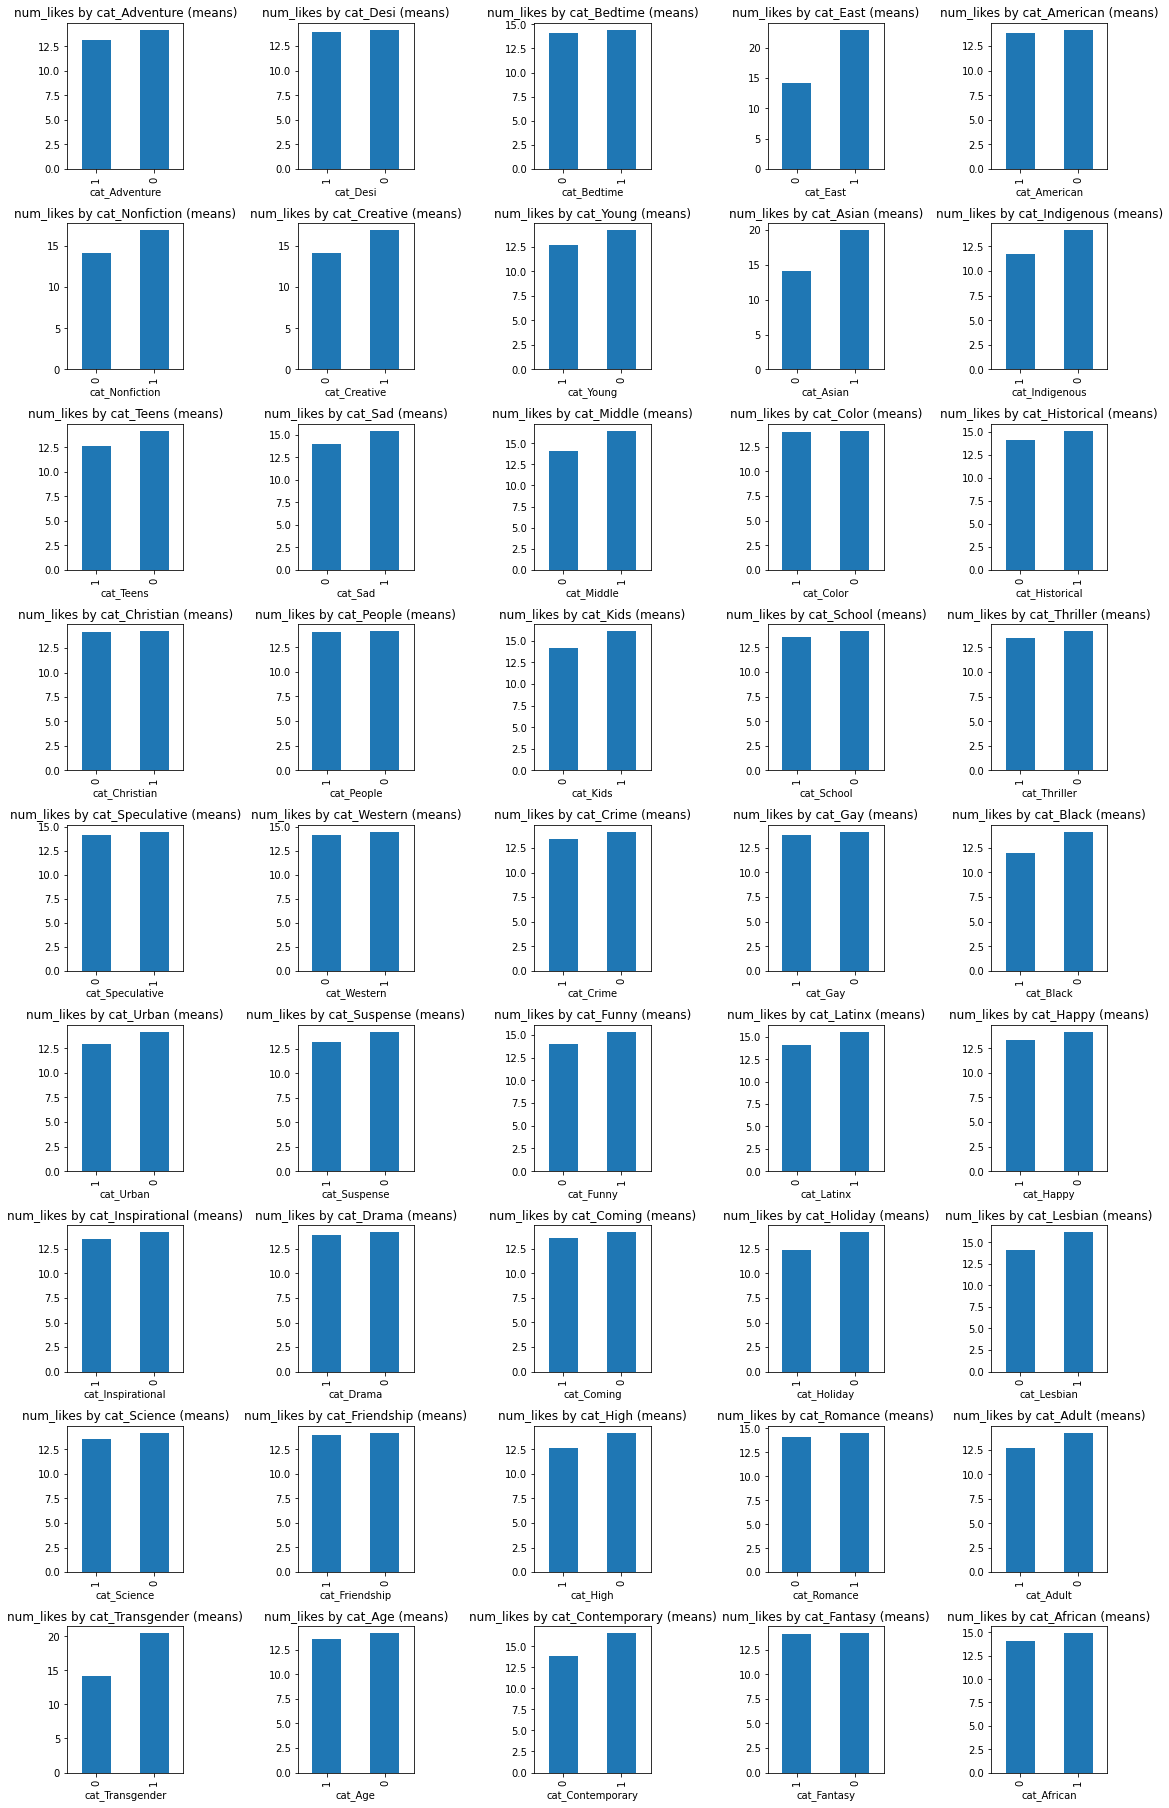

In [17]:
my_j = int(len(categories)/5)

f,ax=plt.subplots(my_j,
                  5, 
                  figsize=(16,25), 
                  constrained_layout = True)
feat_iter=iter(categories)

for i in range(my_j):
    for j in range(5):
      try:
        x = next(feat_iter)
        df.groupby(x)[target].mean().sort_values().plot.bar(ax=ax[i,j])
        ax[i,j].set_title(f"{target} by {x} (means)")
      except StopIteration:
          pass

## Against target

Correlation of numerical features with target

In [27]:
target = 'num_likes'
threshold = 400
for my_var in numerical:
  print(my_var ,'= ', df[df.num_likes<threshold][my_var].corr(df[df.num_likes<threshold][target]))

num_likes =  1.0
num_comments =  0.6513481714797659
num_sent =  -0.0021120068171336893
sent_avg_length =  0.025082780528647767
num_words =  0.013409642957923807
num_unique_words =  0.029778243840703118
unique_words_percent =  0.0292346545704477
age =  -0.02145681608332524
num_cats =  -0.006931574871593074


Number of likes is our target, so it should be highly correlated with itself (threshold is offset).

Number of comments, as suspected, is highly correlated as well.

The length of the story doesn't seem to have much of a linear correlation with the target.

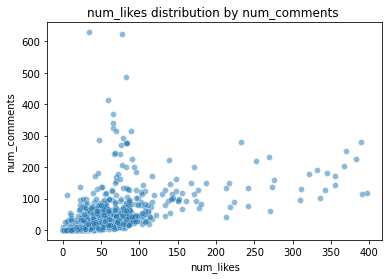

In [29]:
var_to_plot = 'num_comments'
sns.scatterplot(y = var_to_plot, x = target, data = df[df.num_likes<threshold], alpha = 0.5);
plt.title(target + f' distribution by {var_to_plot} ');


Pretty good indicator for at least a certain number of likes.

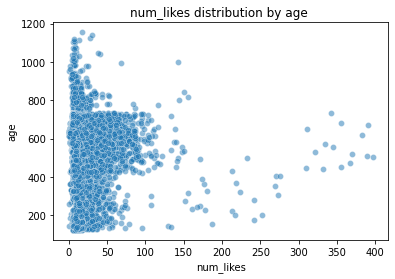

In [30]:
var_to_plot = 'age'
sns.scatterplot(y = var_to_plot, x = target, data = df[df.num_likes<threshold], alpha = 0.5);
plt.title(target + f' distribution by {var_to_plot} ');


## Correlation between features

In [31]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df[numerical].corr()
df_styled = corr.style.applymap(color_map)
df_styled

,num_likes,num_comments,num_sent,sent_avg_length,num_words,num_unique_words,unique_words_percent,age,num_cats
num_likes,1.000000,0.661407,-0.004476,0.024096,0.011262,0.027210,0.029062,-0.018383,-0.006356
num_comments,0.661407,1.000000,-0.003713,0.031555,0.016652,0.034020,0.024421,0.015963,-0.003173
num_sent,-0.004476,-0.003713,1.000000,-0.209877,0.777660,0.680707,-0.562068,-0.035281,0.022760
sent_avg_length,0.024096,0.031555,-0.209877,1.000000,-0.006427,0.003545,0.023172,0.007248,0.012512
num_words,0.011262,0.016652,0.777660,-0.006427,1.000000,0.924843,-0.632941,-0.065871,0.029695
num_unique_words,0.027210,0.034020,0.680707,0.003545,0.924843,1.000000,-0.318843,-0.099606,0.026827
unique_words_percent,0.029062,0.024421,-0.562068,0.023172,-0.632941,-0.318843,1.000000,-0.034728,-0.022660
age,-0.018383,0.015963,-0.035281,0.007248,-0.065871,-0.099606,-0.034728,1.000000,0.035135
num_cats,-0.006356,-0.003173,0.022760,0.012512,0.029695,0.026827,-0.022660,0.035135,1.000000
